## importing required libraries

In [8]:
import cv2
import argparse
import numpy as np
import glob

import matplotlib.pyplot as plt

            

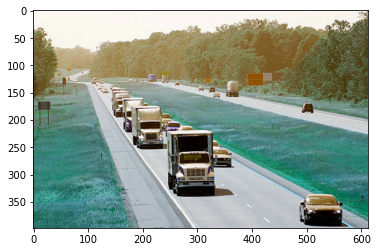

In [9]:
# read class names from text file
classes = None
with open('Classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg.txt')

#reading input image
image = cv2.imread('C:/Users/uttej_aei8x/Intelligent Systems/data/Sample5.jpg')
plt.imshow(image)
plt.show()
def process_image(image):
    Width = image.shape[1]
    Height = image.shape[0]
    scale = 0.00392

    # create input blob 
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

    # set input blob for the network
    net.setInput(blob)
    return net

## Output layer and bounding box

In [10]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    return cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

## Inferences

In [11]:
# gathering predictions from output layers and conducting inference across the network
out_layers = process_image(image).forward(get_output_layers(net))

classIDS = []
confidence_list = []
packs = []

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for i in out_layers:
    for detection in i:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:   #Putting the confidence threshold as 0.5
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w = int(detection[2] * image.shape[1])
            h = int(detection[3] * image.shape[0])
            x = center_x - w / 2
            y = center_y - h / 2
            classIDS.append(classID)
            confidence_list.append(float(confidence))
            packs.append([x, y, w, h])

## Non Max Suppression


In [12]:
# apply non-max suppression
conf_threshold = 0.5
nmaxs_threshold = 0.4
indices = cv2.dnn.NMSBoxes(packs, confidence_list, conf_threshold, nmaxs_threshold)

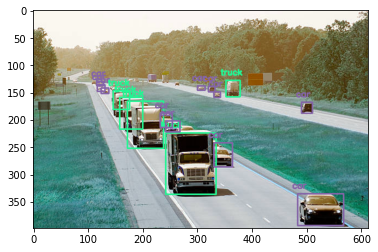

In [13]:
# go through the detections remaining
# after nms and draw bounding box

# def detected_image(indices):
    
for i in indices:
    i = i[0]
    box = packs[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_bounding_box(image, classIDS[i], confidence_list[i], round(x), round(y), round(x+w), round(y+h))

    # display output image   
plt.imshow(image)
# return plt
plt.show()